warehouseCode
a    131688
b    219183
c    124880
d     79380
Name: total_items, dtype: int64


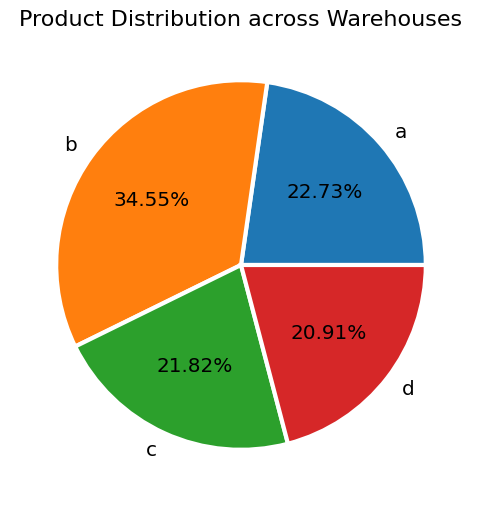

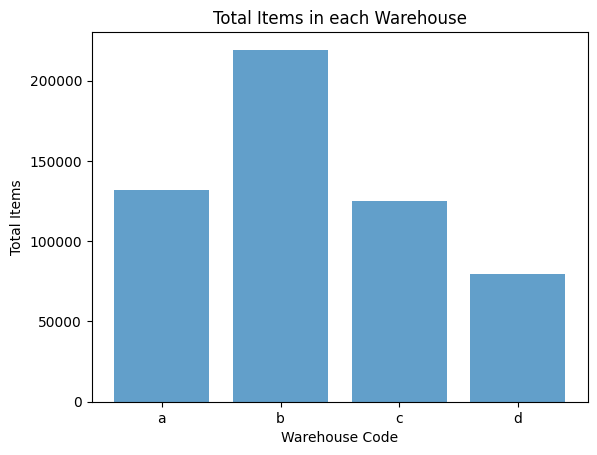

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(6, 6))

item_file_path = '/content/itemsPerWarehouse.csv'
items = pd.read_csv(item_file_path)
labels = items['warehouseCode'].unique()
total_items = items.groupby('warehouseCode')['total_items'].sum()
print(total_items)

types = np.array([25,38,24,23])
ax.pie(types, labels=labels, autopct='%.2f%%',
       wedgeprops={'linewidth':3.0, 'edgecolor':'white'},
       textprops={'size':'x-large'})
ax.set_title('Product Distribution across Warehouses', fontsize=16)
plt.show()

plt.savefig('fig1_2.png')

plt.bar(labels, total_items, alpha=0.7)
plt.xlabel('Warehouse Code')
plt.ylabel('Total Items')
plt.title('Total Items in each Warehouse')
plt.show()

plt.savefig('fig1_1.png')

In [ ]:
"""
Dict Format:
{
    'Warehouse Code': {
        'Product Line': number of Products
    }
}
"""
warehouses = {
    'a': {
        'motorcycles': 13,
        'planes': 12
    },
    'b': {
        'classic cars': 38
    },
    'c': {
        'vintage cars': 24
    },
    'd': {
        'ships': 9,
        'trucks and buses': 11,
        'trains': 3
    }
}

df = pd.DataFrame(warehouses)
df

,a,b,c,d
motorcycles,13.0,NaN,NaN,NaN
planes,12.0,NaN,NaN,NaN
classic cars,NaN,38.0,NaN,NaN
vintage cars,NaN,NaN,24.0,NaN
ships,NaN,NaN,NaN,9.0
trucks and buses,NaN,NaN,NaN,11.0
trains,NaN,NaN,NaN,3.0


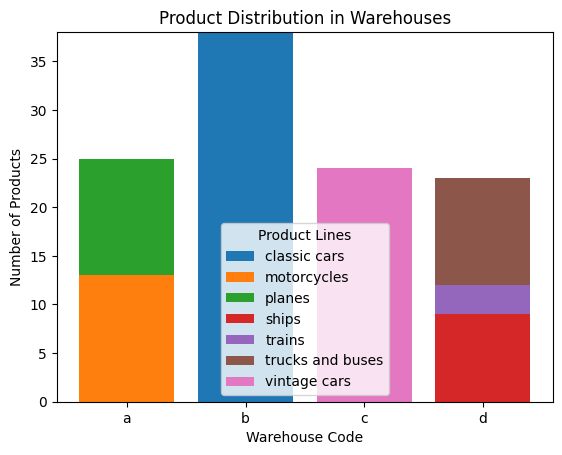

<Figure size 640x480 with 0 Axes>

In [ ]:
warehouse_codes = list(warehouses.keys())
product_lines = set()
for products in warehouses.values():
    product_lines.update(products.keys())
product_lines = sorted(product_lines)

data = {product: [] for product in product_lines}

for warehouse in warehouse_codes:
    for product in product_lines:
        data[product].append(warehouses[warehouse].get(product, 0))


fig, ax = plt.subplots()
bottom = np.zeros(len(warehouse_codes))

for product in product_lines:
    values = data[product]
    ax.bar(warehouse_codes, values, label=product, bottom=bottom)
    bottom += np.array(values)

ax.set_xlabel('Warehouse Code')
ax.set_ylabel('Number of Products')
ax.set_title('Product Distribution in Warehouses')
ax.legend(title='Product Lines')
plt.show()

plt.savefig('fig1_3.png')

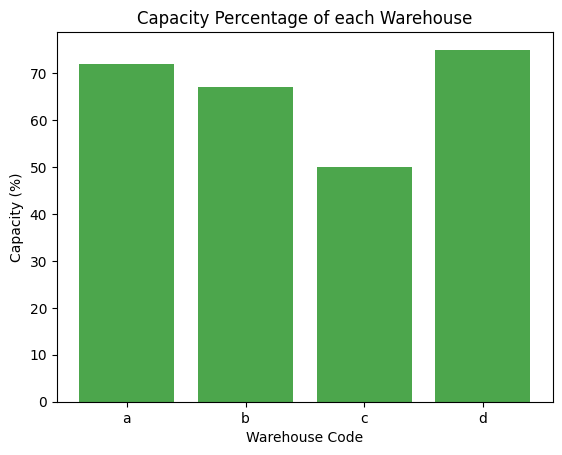

<Figure size 640x480 with 0 Axes>

In [ ]:
pctCap = np.array([72,67,50,75])
plt.bar(labels, pctCap, color='green',alpha=0.7)
plt.xlabel('Warehouse Code')
plt.ylabel('Capacity (%)')
plt.title('Capacity Percentage of each Warehouse')
plt.show()

plt.savefig('fig2_1.png')

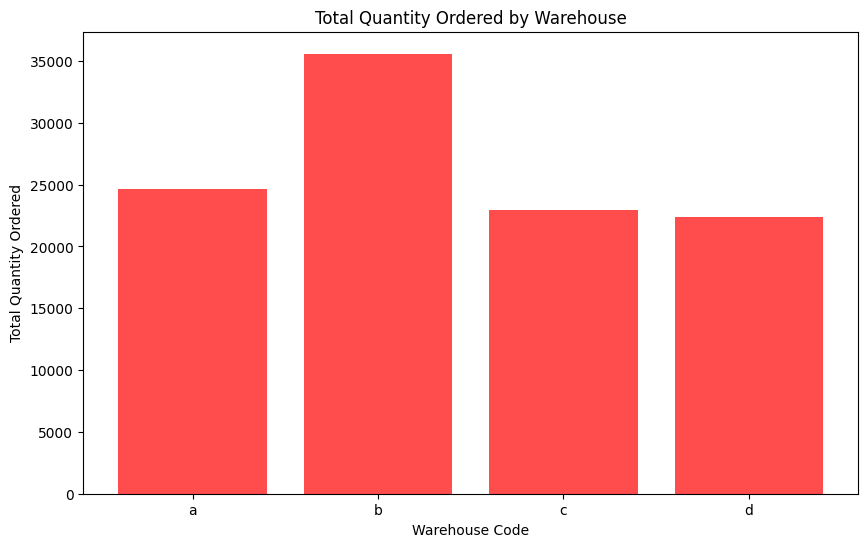

,warehouseCode,totalQuantityOrdered
0,a,24650
1,b,35582
2,c,22933
3,d,22351


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/productsOrdered.csv'
data = pd.read_csv(file_path)

warehouse_totals = data.groupby('warehouseCode')['totalQuantityOrdered'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(warehouse_totals['warehouseCode'], warehouse_totals['totalQuantityOrdered'], color='red', alpha=0.7)
plt.xlabel('Warehouse Code')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered by Warehouse')
plt.show()
plt.savefig('fig2_2.png')

df = pd.DataFrame(warehouse_totals)
# df.set_index('warehouseCode')
df

In [ ]:
# Capacity and Items: Calculate new PCT Cap
total_c_cap = 124880 * 2; #100%
new_c_cap = total_items[3] + total_items[2]
new_c_pct = new_c_cap / total_c_cap * 100;
print("--------WAREHOUSE C INFORMATION--------")
print("Updated PCT Cap if combined with Warehouse d: {:.2f}%".format(new_c_pct))
print(f"Updated Item Count: {new_c_cap} total items.")

--------WAREHOUSE C INFORMATION--------
Updated PCT Cap if combined with Warehouse d: 81.78%
Updated Item Count: 204260 total items.


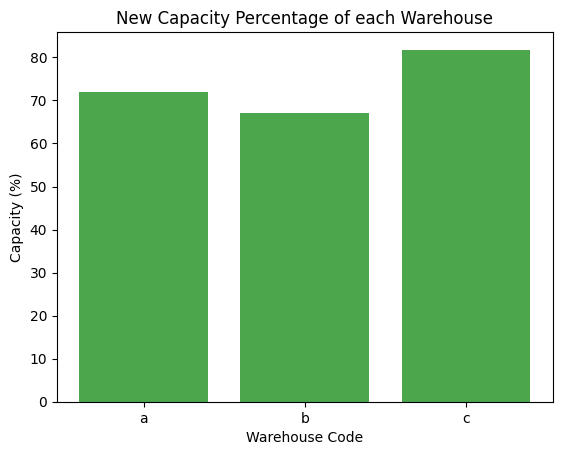

<Figure size 640x480 with 0 Axes>

In [ ]:
new_pctCap = np.array([72,67,new_c_pct])
plt.bar(labels[:3], pctCap, color='green', alpha=0.7)
plt.xlabel('Warehouse Code')
plt.ylabel('Capacity (%)')
plt.title('New Capacity Percentage of each Warehouse')
plt.show()

plt.savefig('fig2_3.png')